# Classification - Using Credit Card Payment Data to Predict If a Client will Default the Following Month

Analysis by Jordan Lue

## Learning Outcomes


* Data exploration and pre-processing

* Develop a pipeline to carry out classification

* Compare different metrics and classifiers

The objective is to predict whether or not a credit card client will default for their payment in the next month. We will be using the better of 2 classifiers namely, Random Forest and KNN Classifier, and determine the best of a given set of hyperparameters by using grid search.

## Contents

1. Data Exploration  
1.1. Data Overview  
1.2. Feature Examination  
1.3. Correlations and Relationships  

2. Data Preprocessing  
2.1. Pipeline  
2.2. Cross-Validation to compare models with/without correlated features  
2.3. Grid Search to Tune Hyperparameters and Select Model  

3. Model Evaluation  
3.1. Confusion Matrix  
3.2. ROC Curve  
3.3. Confusion Matrix with Tuned Threshold  
 
4. Appendix  
4.1. List of Assignment Questions  
4.2. Other References and Notes  
4.3. Code for Recycling  

## 1. Data Exploration
### 1.1. Data Overview

From: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#
#### Data Set Information
The dataset was taken from a Taiwanese research study aimed at predicting the accuracy of six classification models for the probability of customer default payments.

#### Field Descriptions
| Field ID | Field Name                 | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
|----------|----------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| X1       | LIMIT_BAL                  | X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.                                                                                                                                                                                                                                                                                                                                                            |
| X2       | SEX                        | X2: Gender (1 = male; 2 = female).                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| X3       | EDUCATION                  | X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).                                                                                                                                                                                                                                                                                                                                                                                                                 |
| X4       | MARRIAGE                   | X4: Marital status (1 = married; 2 = single; 3 = others).                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| X5       | AGE                        | X5: Age (year).                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| X6       | PAY_0                      | X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. |
| X7       | PAY_2                      |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| X8       | PAY_3                      |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| X9       | PAY_4                      |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| X10      | PAY_5                      |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| X11      | PAY_6                      |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| X12      | BILL_AMT1                  | X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.                                                                                                                                                                                                                                                                                           |
| X13      | BILL_AMT2                  |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| X14      | BILL_AMT3                  |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| X15      | BILL_AMT4                  |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| X16      | BILL_AMT5                  |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| X17      | BILL_AMT6                  |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| X18      | PAY_AMT1                   | X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.                                                                                                                                                                                                                                                                                                                                 |
| X19      | PAY_AMT2                   |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| X20      | PAY_AMT3                   |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| X21      | PAY_AMT4                   |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| X22      | PAY_AMT5                   |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| X23      | PAY_AMT6                   |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| Y        | default payment next month | This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable.                                                                                                                                                                                                                                                                                                                                                                                            |

#### Class distribution:

0  :  23364  
1  :  6636

#### Data Characteristics
* There are 30,000 samples with no null values in the features

In [246]:
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [247]:
df = pd.read_excel("default of credit card clients.xls", skiprows= 1, header = 0)

In [248]:
df.rename(columns = {'default_payment_next_month':'target'}, inplace=True);

In [249]:
df['target'].value_counts()

0    23364
1     6636
Name: target, dtype: int64

In [250]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [251]:
df.dtypes

ID           int64
LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
target       int64
dtype: object

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
target       30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


### 1.2. Feature Examination

In [253]:
dep_var = ['target']

categorical_vars = ['SEX', 'EDUCATION', 'MARRIAGE']

discrete_vars = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [254]:
df.loc[:, dep_var + categorical_vars + discrete_vars].describe()

,target,SEX,EDUCATION,MARRIAGE,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,0.221200,1.603733,1.853133,1.551867,167484.322667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,0.415062,0.489129,0.790349,0.521970,129747.661567,9.217904,1.123802,1.197186,1.196868,1.169139,...,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,1.000000,0.000000,0.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,1.000000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,0.000000,2.000000,2.000000,2.000000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,0.000000,2.000000,2.000000,2.000000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1.000000,2.000000,6.000000,3.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


* Data has varying scales and needs to be scaled
* Categorical values show up as numeric and will need to be encoded

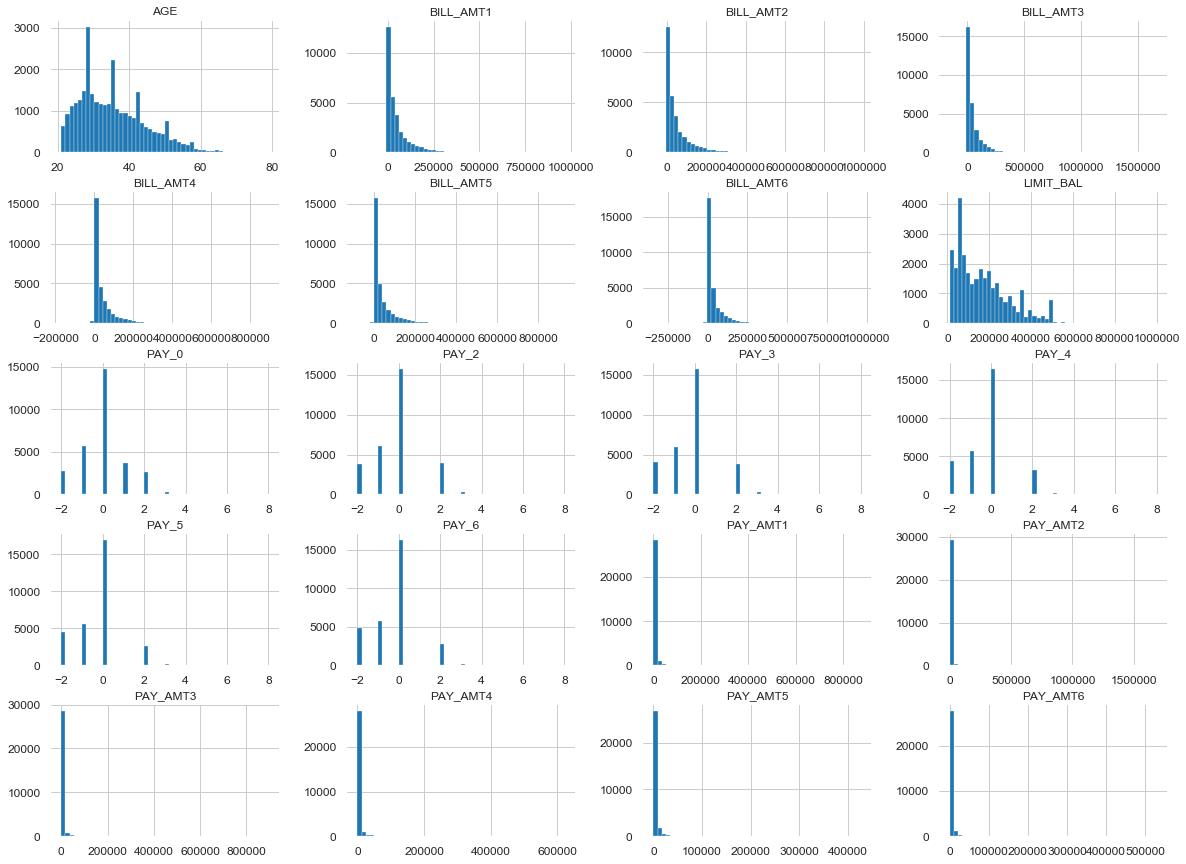

In [255]:
df.loc[:, discrete_vars].hist(bins=50, figsize=(20,15))
plt.show()

* Most of the features associated with balance amounts or payments are skewed to the right, as well as age
* The bill amount follows a logarithmic distribution
* Pay amounts have some heavy outliers

### 1.2. Correlations and Relationships

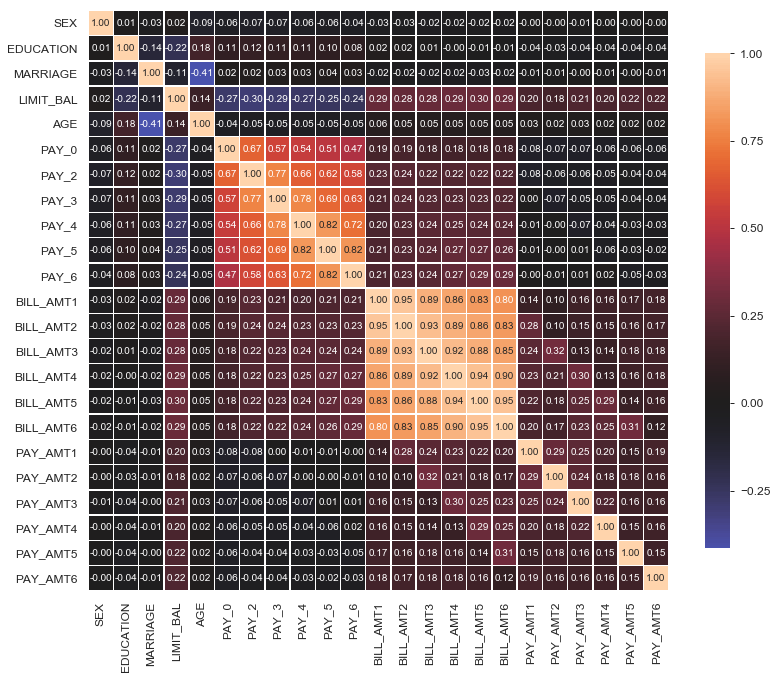

In [256]:
## Code modified from: https://towardsdatascience.com/why-feature-correlation-matters-a-lot-847e8ba439c4
def correlation_heatmap(df):
    correlations = df.corr()

    fig, ax = plt.subplots(figsize=(13,13))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(df.loc[:, categorical_vars + discrete_vars])

* The Bill Amount features are highly correlated with one another
* The Pay features are also correlated with on another to varying degrees

We will need to consider this if we choose algorithms that are not immune to multicollinearity 

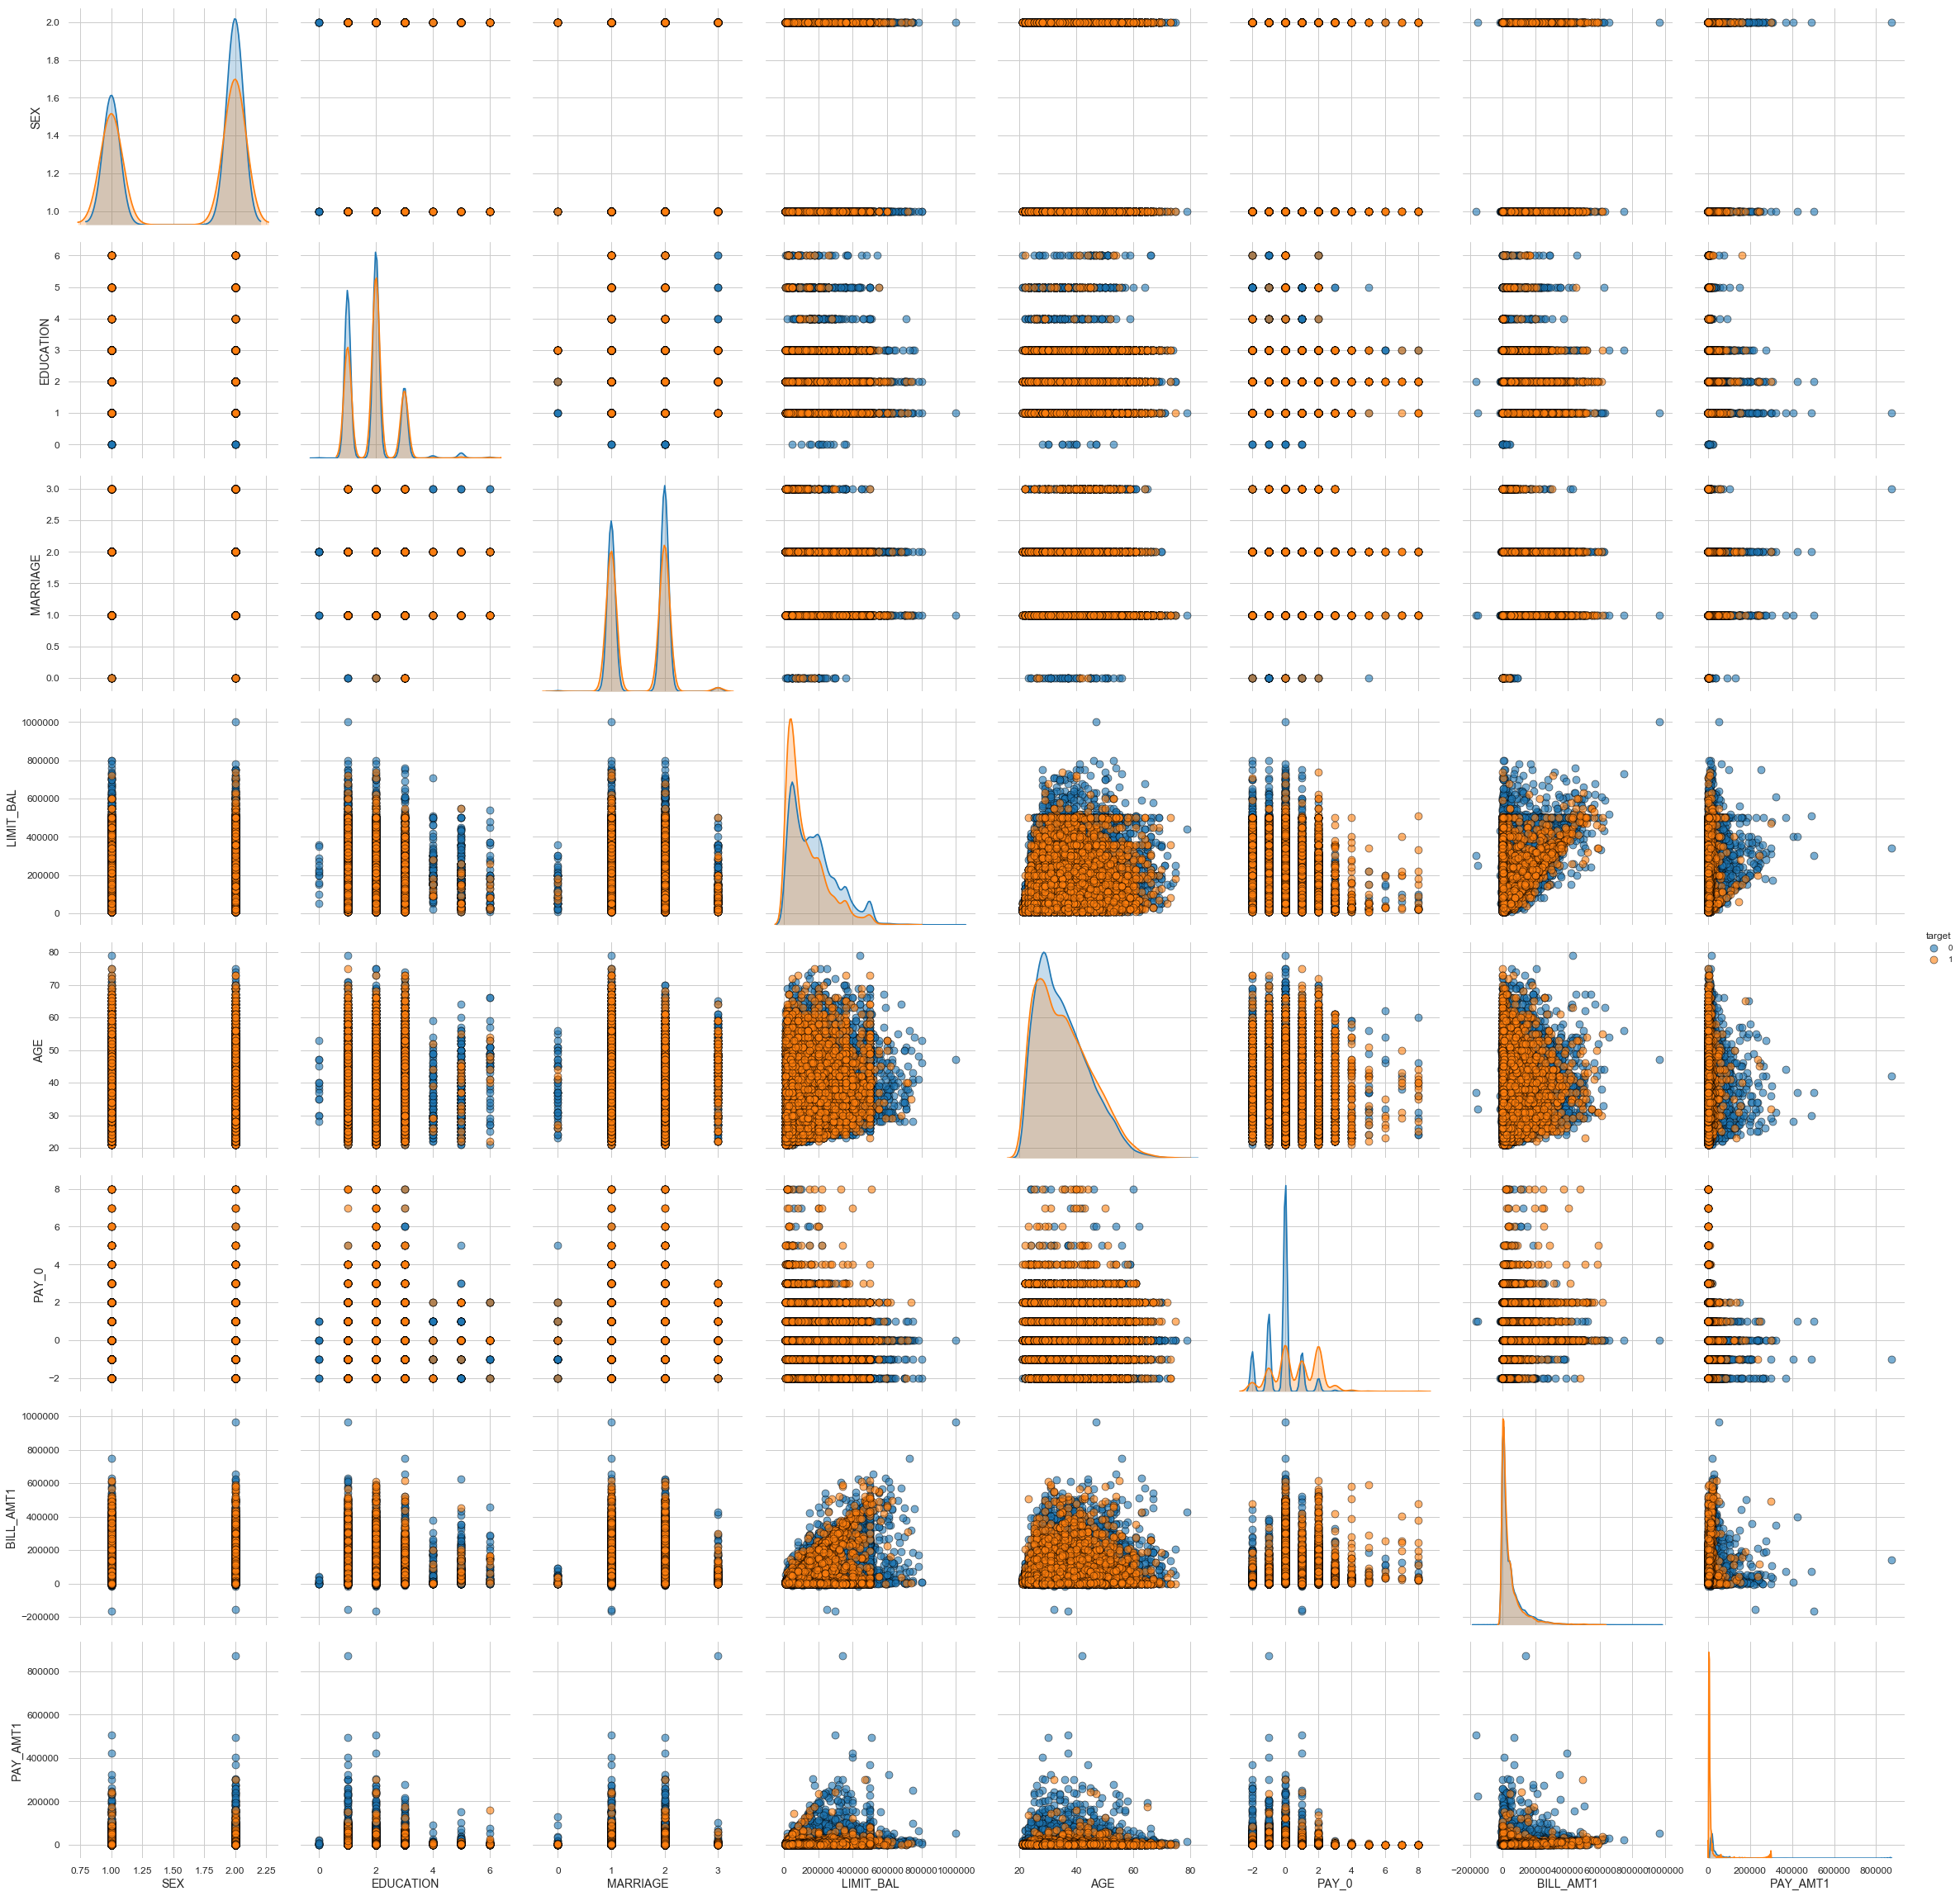

In [257]:
## Code modified from: https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

sns.pairplot(df, 
             vars = categorical_vars + ['LIMIT_BAL', 'AGE', 'PAY_0', 'BILL_AMT1', 'PAY_AMT1'], 
             hue = 'target', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 4);

I chose fewer features to show on the pairplot so that I can interpret it and so that it remains legible

A few observations that I gleaned:
* I'll want to assess the categorical features further to look at differences of the target variable across each group
* Lower bill amounts/payments show higher concentrations of defaults for next payments
* For Limit Balance, although it features a right skew, the peak of the default group is higher for lower balances
* Those who paid promptly in this month have fewer defaults in the target next month

I zoom in on the distribution plots of discrete variables compared with the target.

#### Discrete Features Against the Target

In [258]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color="dodgerblue", lw=4),
                Line2D([0], [0], color="orange", lw=4)]

In [259]:
## Code inspired by: https://www.kaggle.com/lucabasa/credit-card-default-a-very-pedagogical-notebook
## Histogram stylization from: https://www.machinelearningplus.com/plots/matplotlib-histogram-python-examples/
## Custom Legends: Custom Legend https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/custom_legends.html

def draw_distplot(df, variables, n_rows, n_cols, title):
    fig=plt.figure(figsize=(16,16))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        sns.distplot(df.loc[df.target==1, var_name] , color="dodgerblue", ax=ax, axlabel=False, kde=True)
        sns.distplot(df.loc[df.target==0, var_name] , color="orange", ax=ax, axlabel=False, kde=True)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    fig.legend(custom_lines, ['Default', 'Non-Defaulted'], loc='upper right', borderaxespad=0.)
    fig.suptitle(title, fontsize=16, y=1.08)
    plt.show()  

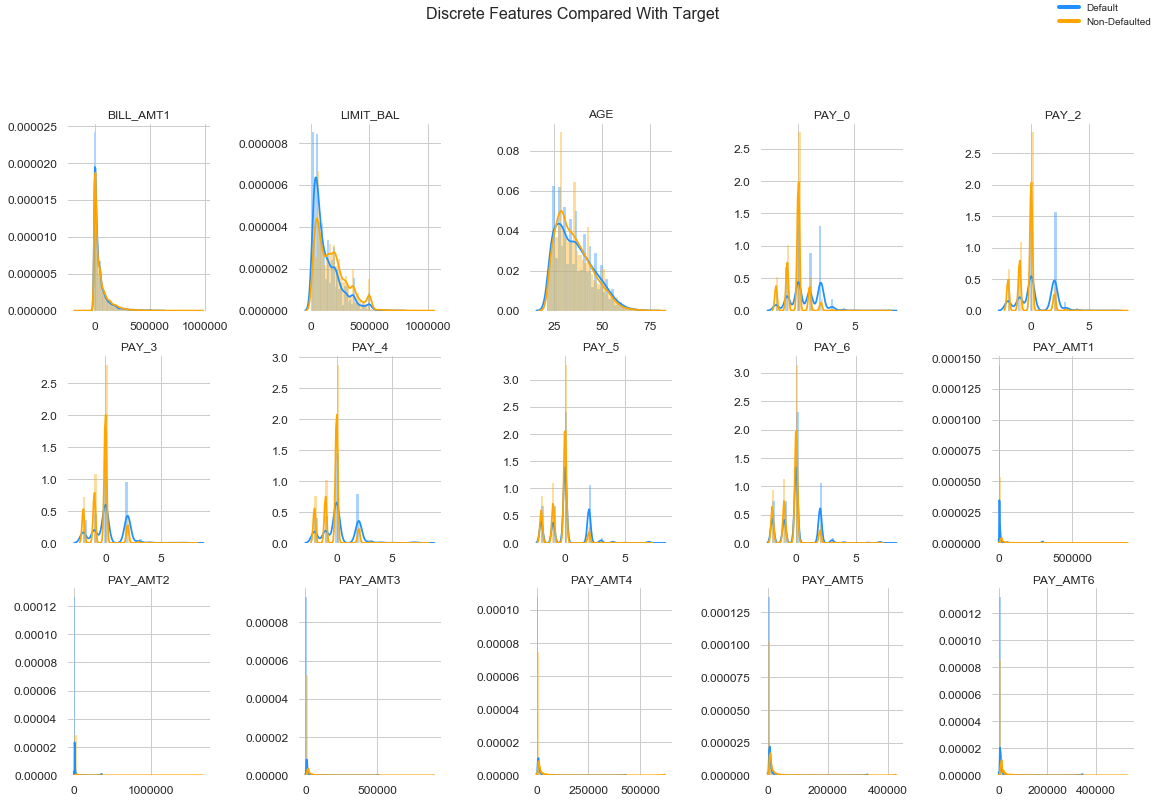

In [260]:
draw_distplot(df, ['BILL_AMT1', 'LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], 5, 5, "Discrete Features Compared With Target")

We can see differences in the shapes of the distributions of default vs non-default clients within many of the features, which is good. These features can help to predict the target. 

#### Categorical Features Against the Target

In [261]:
## Code inspired by: https://stackoverflow.com/questions/51495982/display-totals-and-percentage-in-stacked-bar-chart-using-dataframe-plot/51497791

def stacked_bar(variable):
    var_df = df[[variable,'target']].pivot_table(index=variable, columns='target', aggfunc=len, fill_value=0)
    #print(var_df)
    df_total=df[variable].value_counts().sort_index()
    #print(df_total)
    df_rel = var_df.div(df_total, 0)*100
    #print(df_rel)
    #print(var_df.reset_index().iloc[:, 1:])
    var_df.plot(kind='barh',stacked = True, title = 'Outcomes by ' + variable, color=['orange', 'dodgerblue'], figsize=(6,4)).legend(bbox_to_anchor=(1, 0.25))
    
    for n in df_rel:
        for i, (cs, ab, pc, tot) in enumerate(zip(var_df.reset_index().iloc[:, 1:].cumsum(1)[n], var_df[n], df_rel[n], df_total)):
            if tot > 1000:
                plt.text(tot, i, str(tot), va='center', rotation=270)
                plt.text(cs - ab/2, i, str(np.round(pc, 1)) + '%', va='center', ha='center')
            
    plt.show()


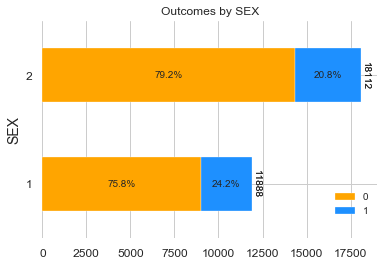

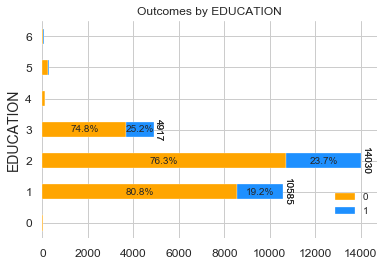

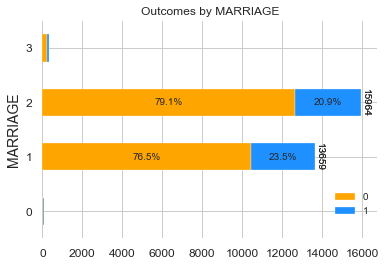

In [262]:
for item in [x for x in categorical_vars]:
#    if item == 'amenities':
#        next
    stacked_bar(item)

* Sex: There are a higher proportion of defaults amongst males
* Education: lower levels of education show higher proportions of defaults. What is the 5th category here? It is not defined in the notes.
* Marriage: Married couples have a higher proportion of defaults

## 2. Data Preprocessing
### 2.1. Pipeline

In [263]:
import scipy
import pylab as pl
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV

In [264]:
discrete_vars = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [265]:
cat_ohe_step = ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))
cat_pipe = Pipeline(steps=[cat_ohe_step])
cat_transformers = [('cat', cat_pipe, categorical_vars)]

num_scl_step = ('scl', MinMaxScaler())
num_pipe = Pipeline(steps=[num_scl_step])
num_transformers = [('num', num_pipe, discrete_vars)]


In [266]:
ct = ColumnTransformer(transformers=cat_transformers + num_transformers)
ct.fit(df[categorical_vars + discrete_vars])
X = ct.transform(df[categorical_vars + discrete_vars])
y = df[['target']].values

C:\Users\jdonv\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [267]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(24000, 33) (6000, 33) (24000, 1) (6000, 1)


In [268]:
## https://www.scikit-yb.org/en/latest/tutorial.html

models = [
    KNeighborsClassifier(),
    RandomForestClassifier()
]


def score_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """

    # Instantiate the classification model and visualizer
    model.fit(X, y, **kwargs)

    expected  = y
    predicted = model.predict(X)

    # Compute and return F1 (harmonic mean of precision and recall)
    print("{}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted)))

for model in models:
    score_model(X_train, np.ravel(y_train), model)

KNeighborsClassifier: 0.5597958473494954


C:\Users\jdonv\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier: 0.9583657587548637


### 2.2. Cross-Validation to compare models with/without correlated features

In [269]:
#Reference, pipelines: https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf
#Reference, cross validation: https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation
#Reference, list of classifiers: https://scikit-learn.org/stable/modules/classes.html
#Reference, list of scoring types: https://scikit-learn.org/stable/modules/model_evaluation.html

scoring = ['accuracy', 'f1']

In [270]:
# Function modified from: https://www.scikit-yb.org/en/latest/tutorial.html

def score_model_cross_val(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """

    scores = cross_validate(estimator, X, np.ravel(y), cv=5, scoring=scoring, return_train_score=False)

    # Compute and return F1 (harmonic mean of precision and recall)
    print("{} accuracy: {}%, std: {}%".format(estimator.__class__.__name__, round(scores['test_accuracy'].mean()*100, 3), round(scores['test_accuracy'].var()*100, 3)))
    print("{} f1 score: {}%, std: {}%".format(estimator.__class__.__name__, round(scores['test_f1'].mean()*100, 3), round(scores['test_f1'].var()*100, 3)))
    
    
#From pima-indian-diabetes-binary-classification.ipynb in Module 3-01, we see that training set is used
for model in models:
    score_model_cross_val(X_train, np.ravel(y_train), model)

KNeighborsClassifier accuracy: 79.333%, std: 0.0%
KNeighborsClassifier f1 score: 41.944%, std: 0.005%
RandomForestClassifier accuracy: 80.304%, std: 0.001%
RandomForestClassifier f1 score: 41.784%, std: 0.014%


Earlier, we saw that the BILL_AMT fields were highly correlated with one another. I would like to see if removing them improves the model.

In [271]:
discrete_vars = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [272]:
num_transformers = [('num', num_pipe, discrete_vars)]
ct = ColumnTransformer(transformers=cat_transformers + num_transformers)
ct.fit(df[categorical_vars + discrete_vars])
X = ct.transform(df[categorical_vars + discrete_vars])
y = df[['target']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

for model in models:
    score_model_cross_val(X_train, np.ravel(y_train), model)

C:\Users\jdonv\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


KNeighborsClassifier accuracy: 79.346%, std: 0.001%
KNeighborsClassifier f1 score: 42.49%, std: 0.004%
RandomForestClassifier accuracy: 80.538%, std: 0.001%
RandomForestClassifier f1 score: 42.612%, std: 0.007%


We see that removing the correlated features of billing improves the model slightly. I will leave them out for the rest of the analysis.

###  2.3. Grid Search to Tune Hyperparameters and Select Model

With grid search, our goal is to train various random forest and KNN models with different hyper parameters and then evaluate them using a scoring metric with cross validation. I use the ROC AUC scoring metric to evaluate the models.

In [273]:
param_grid_rfc = {'n_estimators': [4, 5, 10, 20, 50]}

param_grid_knn = {'n_neighbors': [3, 5, 10, 20]}

models = [(KNeighborsClassifier(),param_grid_knn),
          (RandomForestClassifier(), param_grid_rfc)]

In [274]:
# Modified from: https://www.scikit-yb.org/en/latest/tutorial.html

def score_model_gridsearch(X, y, estimator, param_grid, **kwargs):
    # we pass the model, our parameter grid, and cross-validation parameters to the class
    grid_search = GridSearchCV(estimator=estimator, 
                               param_grid=param_grid,
                               scoring='roc_auc',
                               cv=5)
    # last, we fit our data. This will take a while...
    grid_search.fit(X=X, y=np.ravel(y))
    print("{} roc_auc score: {}%".format(estimator.__class__.__name__, round(grid_search.best_score_*100, 3)))
    print("{} best parameters: {}".format(estimator.__class__.__name__, grid_search.best_params_))
    print("\n",grid_search.best_estimator_)
    print("\n")
    return grid_search.best_estimator_
    
tuned_model = []
    
for model in models:
    tuned_model.append(score_model_gridsearch(X, np.ravel(y), model[0], model[1]))

KNeighborsClassifier roc_auc score: 74.164%
KNeighborsClassifier best parameters: {'n_neighbors': 20}

 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform')


RandomForestClassifier roc_auc score: 75.861%
RandomForestClassifier best parameters: {'n_estimators': 50}

 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)




## 3. Model Evaluation
### 3.1. Confusion Matrix
I first examine the confusion matrix created with the default threshold of 0.5.

In [275]:
model_rfc = tuned_model[1].fit(X_train, np.ravel(y_train))

test accuracy for Random Forest Classifier: 81.72 %


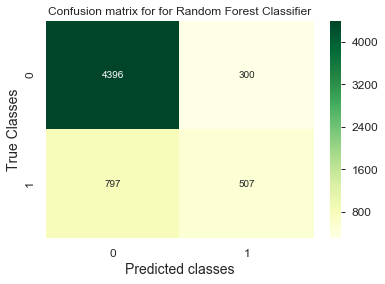

In [276]:
y_hat_rfc = model_rfc.predict(X_test)

print('test accuracy for Random Forest Classifier:'\
      , round(accuracy_score(y_test, y_hat_rfc)*100, 2), '%')
plt.title('Confusion matrix for for Random Forest Classifier')
sns.heatmap(confusion_matrix(y_test, y_hat_rfc), annot=True, cmap="YlGn",fmt="d")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()

In [277]:
tn, fp, fn, tp = confusion_matrix(y_test, y_hat_rfc).ravel()

print('sensitivity for Random Forest Classifier:'\
      , round((tp/(tp+fn))*100, 2), '%')
print('specificity for Random Forest Classifier:'\
      , round((tn/(tn+fp))*100, 2), '%')

sensitivity for Random Forest Classifier: 38.88 %
specificity for Random Forest Classifier: 93.61 %


### 3.2. ROC Curve

Before creating the ROC curve, I want to examine the threshold and determine a good threshold that balances the TPR and FPR. One such method is using Youden's Index. Youden's Index seeks to find where the TPR is the highest while the FPR is the lowest. 

Area under the ROC curve : 0.766394
        fpr       tpr    1-fpr        tf  thresholds
68  0.30494  0.691718  0.69506 -0.003342    0.208333


[]

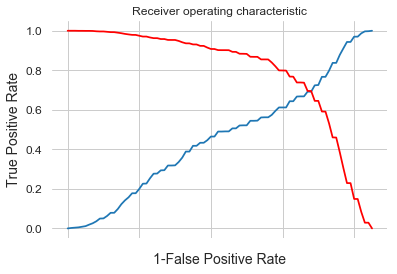

In [278]:
## Code modified from: https://stackoverflow.com/questions/28719067/roc-curve-and-cut-off-point-python

print("Area under the ROC curve : %f" % roc_auc)

####################################
# The optimal cut off would be where tpr is high and fpr is low
# tpr - (1-fpr) is zero or near to zero is the optimal cut off point
####################################
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
print(roc.iloc[(roc.tf-0).abs().argsort()[:1]])

# Plot tpr vs 1-fpr
fig, ax = pl.subplots()
pl.plot(roc['tpr'])
pl.plot(roc['1-fpr'], color = 'red')
pl.xlabel('1-False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic')
ax.set_xticklabels([])

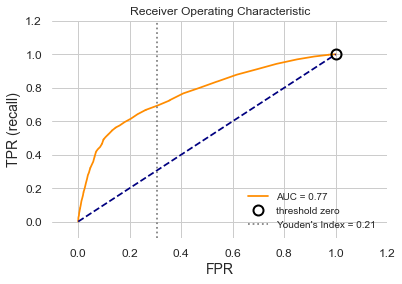

In [279]:
sns.set_style("whitegrid")

fpr, tpr, thresholds = roc_curve(y_test, model_rfc.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
fig, ax = plt.subplots()
ax.plot(fpr, tpr, 'darkorange', label='AUC = %0.2f'% roc_auc)
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.plot([0,1],[0,1],'navy', linestyle="--")
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.title('Receiver Operating Characteristic')
plt.axvline(x=0.307709, linestyle=":", c="gray", label="Youden's Index = %0.2f "% roc.iloc[(roc.tf-0).abs().argsort()[:1]]["thresholds"])

plt.legend(loc=4)

### 3.3. Confusion Matrix with Tuned Threshold

If we decide to change the threshold from 0.5 (default) to 0.203333 we need to recalculate the accuracy and the confusion matrix will also change.

In [280]:
pred_proba_df = pd.DataFrame(model_rfc.predict_proba(X_test))
Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>0.203333 else 0)
Y_test_pred_array = Y_test_pred.iloc[:,1].values.reshape(Y_test_pred.iloc[:,1].values.size,1)
test_accuracy = accuracy_score(y_test, Y_test_pred_array)

test accuracy for Random Forest Classifier: 69.43 %


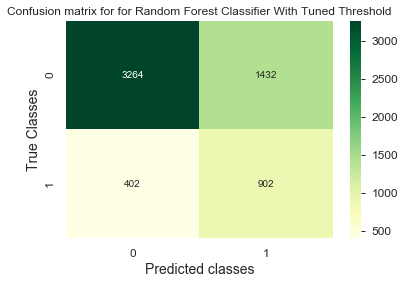

In [281]:
cnf_matrix = confusion_matrix(y_test, Y_test_pred_array)
print('test accuracy for Random Forest Classifier:'\
      , round(test_accuracy*100, 2), '%')
plt.title('Confusion matrix for for Random Forest Classifier With Tuned Threshold')
sns.heatmap(cnf_matrix, annot=True, cmap="YlGn",fmt="d")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()


In [282]:
tn, fp, fn, tp = confusion_matrix(y_test, Y_test_pred_array).ravel()

print('sensitivity for Random Forest Classifier:'\
      , round((tp/(tp+fn))*100, 2), '%')
print('specificity for Random Forest Classifier:'\
      , round((tn/(tn+fp))*100, 2), '%')

sensitivity for Random Forest Classifier: 69.17 %
specificity for Random Forest Classifier: 69.51 %


#### Conclusions

In summary, we examined the features in the dataset, noting that Billing Amounts were highly correlated. Next, we created a pipeline for encoding the categorical features, and scaling the discrete features. We compared a Random Forest Classifier to a K-Neareast Neighbours model, choosing the Random Forest Classifier model with the hyperparameter 50 estimators based on evaluating it with Grid Search, producing a ROC_AUC score of 75.89%. 

The RFC model was evaluated and showed below statistics, when choosing a threshold of 0.203333:
* ROC AUC: 75.89%
* Test accuracy: 69.17 % (compared to 81.97% with a threshold of 0.5)
* Sensitivity (TPR) = 68.94% (compared to 39.49% with a threshold of 0.5)
* Specificity (1-FPR) = 69.23% (compared to 93.76% with a threshold of 0.5)

It is important to note that the threshold is often a business decision and needs to be selected based on the relevance of the classification to the business. 

## 4. Appendix

### 4.1. List of Assignment Questions
**Questions (12 marks total)**

Q1.  Explore the credit card data set provided. You can also access it from the this link 

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
(https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)

The data is open for public use and no authorizations are required.

You will build a classification model for this default of credit card clients dataset.  The objective is to predict whether or not a credit card client will default for their payment in the next month.

Make sure you perform your analyses and answer the questions in sections below:

1. Data exploration:  ( 3 marks) 

    - Explore the data ( for example look at the data, plot graphs ( histogram, pair plots)
    
2. Data Preprocessing: (4 marks)

    - Make sure you build a full data pipeline ( ie., use the pipeline to apply transformers and estimators- https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html )
    - Do you require any data pre-processing? Are all the features useful? (Use only raw features from this dataset, in other words, no need to create feature crosses or new features)
    - Set the random seed to 123 (For splitting or any other random algorithm)
    - Split data into training (80%) and testing (20%)
    - Use Cross-validation with 5-folds
    - For other parameters, use default

3. Classification: (5 marks)

    - Study the ROC Curve, decide threshold
    - Use 2 classifiers.
    
         a. Random Forest
            - tune only: n_estimators: {4, 5, 10, 20, 50}.  We will be running random forest model using GridSearchCV, determine the best hyperparameter for the given list of n_estimators {4, 5, 10, 20, 50}. n_estimators refers to the number of trees in the forest. We will use CV = 5 and the scoring to be the roc_auc (area under the curve)
          
       b. KNN Classfier 
            - tune only: n_neighbors: {3, 5, 10, 20}. You may perform similar GridSearchCV as in the previous exercise with a given list of n_neightbors. 
        
    - Which one performs better in the cross validation? Note down your observations and give comments.
    
You may refer to the documentation for RandomForests and KNN Classifiers, for the different parameters and options available in the scikit-learn library.
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

### 4.2. Other References and notes:
    
https://datasciencelab.wordpress.com/2013/12/21/beautiful-plots-with-pandas-and-matplotlib/
https://pythonplot.com/

More notes on grid search from various sources.
https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/#disqus_thread
* Grid search can be thought of as an extension of K-fold in a sense that in K Fold cross validation you only have specific parameters. While in grid search you try different sets of parameters over multiple folds. So, If you already know the best parameters, try K-Fold directly, else if you are not sure about best parameters, try grid search. The cv attribute in the GridSearchCV is used to specify the number of folds.

02-02 Lesson
* Once we have chosen a model type, it is important to tune its hyperparameters: the parameters that are decided before beginning the training process. We have already seen some hyperparameters as arguments above (e.g. for SGDRegressor). We will discard the assumption that these default hyperparameters are the best possible options, and will instead test different parameters to determine what works best.

https://stackoverflow.com/questions/45394527/do-i-need-to-split-data-when-using-gridsearchcv
* GridSearchCV will take the data you give it, split it into Train and CV set and train algorithm searching for the best hyperparameters using the CV set. You can specify different split strategies if you want (for example proportion of split).


* Should Grid Search be performed on the full set or the training set?
* Here they show it's done on the training set: https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
* According to the professor:
* "Here, cv =5, "GridSearchCV" algorithm splits X into 5 splits. It trains on the first 4 sets, tests on the last set. Next, trains on 2nd to 5th set, tests on 1st set. Next, trains on 3rd,4th, 5th, 1st set and tests on 2nd set, and so on... We aren't explicity setting train and test sets like plain/normal Cross validation."

* This example shows how to output more details about the scoring: https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py


### 4.3. Code for Recycling

In [283]:
def draw_distplotseperate(df, variables, n_rows, n_cols, title):
    fig=plt.figure(figsize=(12,4))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        sns.distplot(df.loc[df.default_payment_next_month==1, var_name] , color="dodgerblue", ax=ax, axlabel=False)
        ax.set_title(var_name)
        
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1+len(variables))
        sns.distplot(df.loc[df.default_payment_next_month==0, var_name] , color="orange", ax=ax, axlabel=False)
        ax.set_title(var_name)
    fig.legend(custom_lines, ['Default', 'Non-Defaulted'], bbox_to_anchor=(1, 0.9), loc='upper left', borderaxespad=0.)
    fig.suptitle(title, fontsize=16, y=1.08)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()  